# Customer will purphase Product or Service

## Importing libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [10]:
df = pd.read_csv('bank-full.csv', delimiter = ';')

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Pre-processing

In [12]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### The dataset is biased towards the label 'no'

In [13]:
majority_class = df[df['y'] == 'no']
minority_class = df[df['y'] == 'yes']

majority_downsampled = resample(majority_class, 
                                replace=False,       # Without replacement
                                n_samples=len(minority_class),  # Match minority class
                                random_state=42)     # For reproducibility

df = pd.concat([majority_downsampled, minority_class]).reset_index().drop(['index'], axis=1)

df['y'].value_counts()


no     5289
yes    5289
Name: y, dtype: int64

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28,unemployed,single,secondary,no,1055,no,no,cellular,28,jan,196,1,-1,0,unknown,no
1,36,blue-collar,married,secondary,no,520,yes,no,unknown,23,may,110,2,-1,0,unknown,no
2,38,technician,single,tertiary,no,1314,yes,yes,cellular,16,jul,378,2,-1,0,unknown,no
3,41,unemployed,married,tertiary,no,28,yes,no,cellular,4,feb,358,2,-1,0,unknown,no
4,27,technician,single,tertiary,no,290,no,no,cellular,10,aug,88,1,-1,0,unknown,no


In [15]:
df.shape

(10578, 17)

In [16]:
df = df[df['contact'] != 'unknown']

In [17]:
df = df[df['pdays'] != 'unknown']

In [18]:
df = df[df['poutcome'] != 'unknown']

In [19]:
df.shape

(2695, 17)

In [21]:
df = df.reset_index().drop(['index'], axis=1)

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,49,unemployed,married,tertiary,no,-471,yes,no,cellular,20,nov,77,3,185,7,failure,no
1,31,blue-collar,married,secondary,no,1716,yes,no,cellular,13,apr,542,2,340,2,other,no
2,37,management,single,tertiary,no,146,yes,no,cellular,17,apr,135,1,336,3,failure,no
3,58,services,married,primary,no,443,no,no,telephone,6,feb,41,2,204,1,failure,no
4,34,housemaid,married,tertiary,no,0,no,no,cellular,26,may,141,1,188,1,failure,no


## Label Encoder

In [23]:
le = LabelEncoder()

In [35]:
le_jobs = le.fit_transform(df.job)
df['job'] = le_jobs
df['month'] = le.fit_transform(df.month)

In [36]:
df['marital'] = df['marital'].replace({'married':0, 'single':1, 'divorced':2})
df['education'] = df['education'].replace({'unknown':0, 'primary':1, 'secondary':3, 'tertiary':4})
df['default'] = df['default'].replace({'no':0, 'yes':1})
df['housing'] = df['housing'].replace({'no':0, 'yes':1})
df['loan'] = df['loan'].replace({'no':0, 'yes':1})
df['contact'] = df['contact'].replace({'cellular':0, 'telephone':1})
df['poutcome'] = df['poutcome'].replace({'failure':0, 'success':1, 'other':3})
df['y'] = df['y'].replace({'no':0, 'yes':1})

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,49,10,0,4,0,-471,1,0,0,20,9,77,3,185,7,0,0
1,31,1,0,3,0,1716,1,0,0,13,0,542,2,340,2,3,0
2,37,4,1,4,0,146,1,0,0,17,0,135,1,336,3,0,0
3,58,7,0,1,0,443,0,0,1,6,3,41,2,204,1,0,0
4,34,3,0,4,0,0,0,0,0,26,8,141,1,188,1,0,0


In [27]:
x_data = df.drop(['y'], axis=1)
y_data = df.y

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=123)

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(x_test)

In [32]:
accuracy_score(y_test, y_pred)

0.7578849721706865

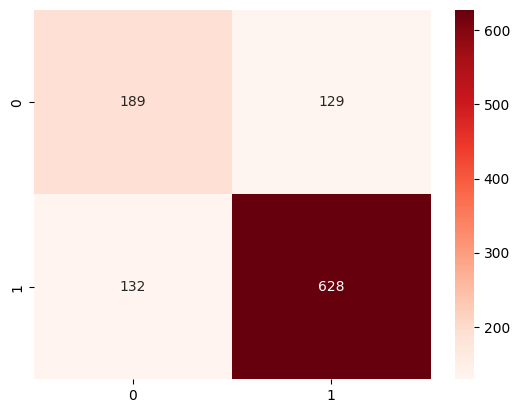

In [37]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, fmt='d', annot=True, cmap='Reds')
plt.show()

## Prediction on unseen data

In [39]:
dt.predict([[55, 3, 1, 3, 0, 43250, 0, 2, 1, 1, 3, 40, 2, 172, 5, 1]])

c:\Users\sahuk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)